In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [10]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [23]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [21]:
# Convert date columns to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [26]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [29]:
# Customer distribution by region
regional_distribution = customers['Region'].value_counts()

In [32]:
regional_distribution

South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64

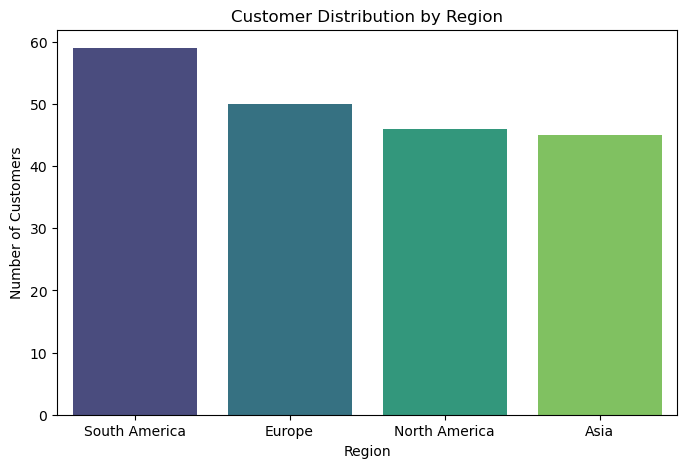

In [35]:
plt.figure(figsize =(8,5))
sns.barplot(x =regional_distribution.index, y=regional_distribution.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

In [38]:
# Product distribution by category
Category_distribution=products['Category'].value_counts()

In [40]:
Category_distribution

Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64

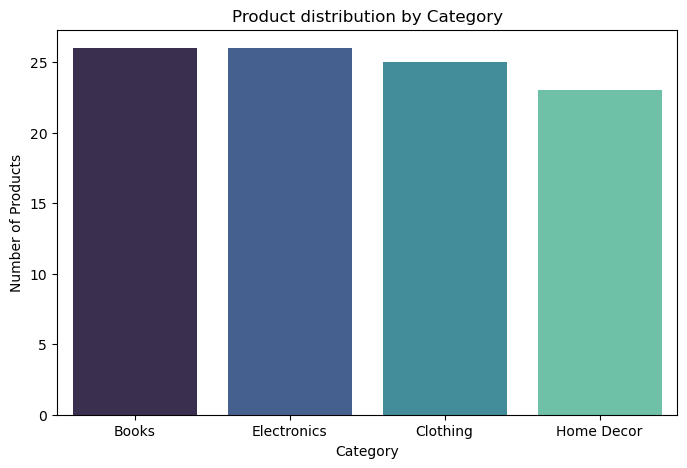

In [43]:
plt.figure(figsize = (8,5))
sns.barplot(x =Category_distribution.index, y = Category_distribution.values, palette="mako")
plt.title("Product distribution by Category")
plt.xlabel("Category")
plt.ylabel('Number of Products')
plt.show()


In [46]:
# Extract year-month for transaction trends
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [52]:
# Extract year-month for transaction trends
transactions['YearMonth']=transactions['TransactionDate'].dt.to_period('M')

In [54]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,YearMonth
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024-03
...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,2024-10
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,2024-06
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,2024-04
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,2024-09


In [60]:
# Aggregate total revenue and transactions by month
monthly_revenue= transactions.groupby('YearMonth')['TotalValue'].sum()

In [62]:
monthly_revenue

YearMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

In [66]:
monthly_transactions=transactions.groupby('YearMonth')['TransactionID'].count()

In [68]:
monthly_transactions

YearMonth
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: TransactionID, dtype: int64

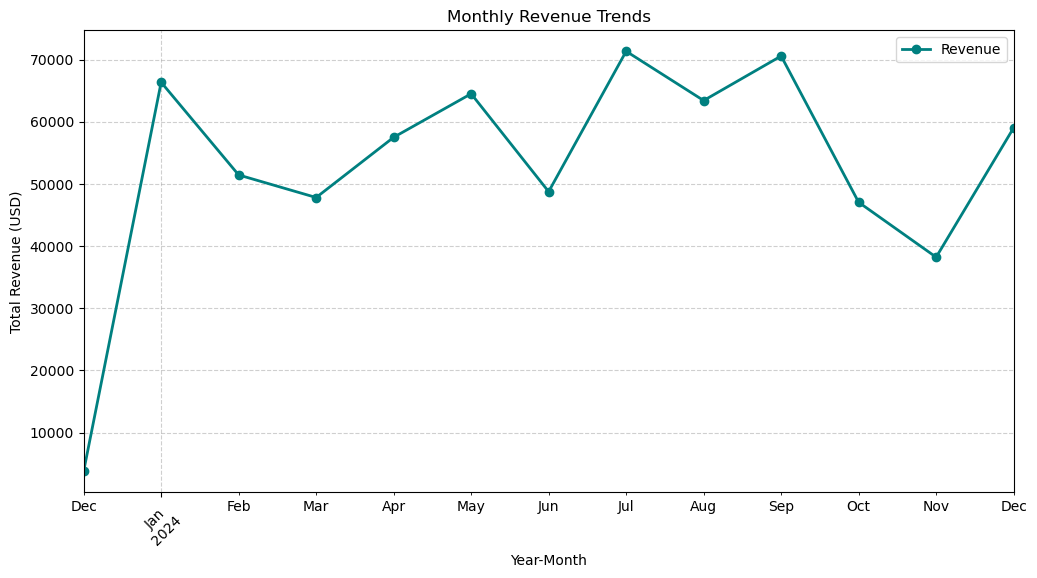

In [70]:
# Plot revenue trends over time
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='teal', label='Revenue', linewidth=2)
plt.title("Monthly Revenue Trends")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

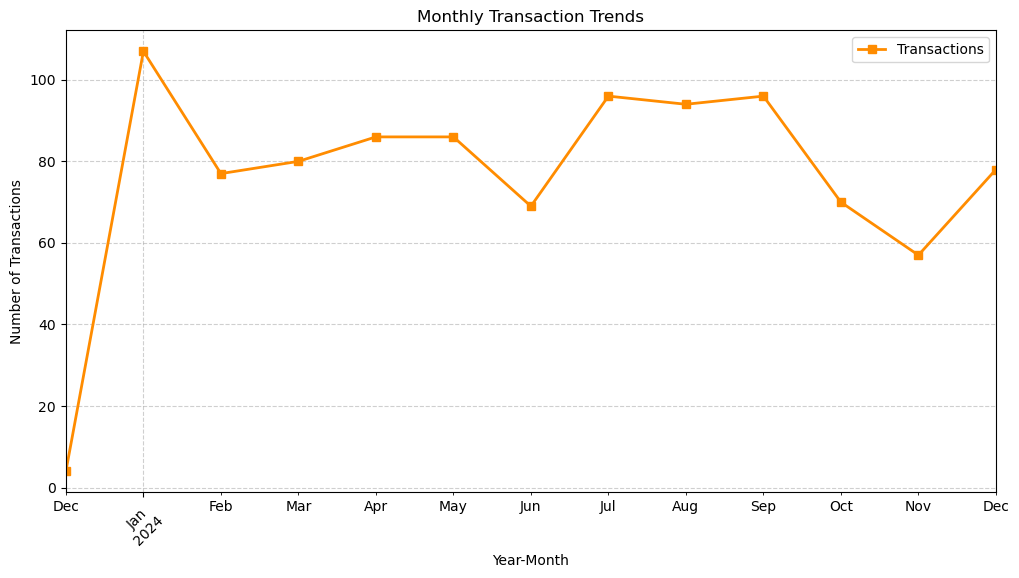

In [72]:
# Plot transaction trends over time
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='s', color='darkorange', label='Transactions', linewidth=2)
plt.title("Monthly Transaction Trends")
plt.xlabel("Year-Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [76]:
# Merge transactions with products and customers
transactions_merged = transactions.merge(products, on = 'ProductID').merge(customers,on ='CustomerID')


In [78]:
transactions_merged

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,YearMonth,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024-08,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,2024-10,HomeSense Wall Art,Home Decor,137.54,Andrea Jenkins,Europe,2022-12-03
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,2024-08,ActiveWear Rug,Home Decor,417.37,Andrea Jenkins,Europe,2022-12-03
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,2024-10,BookWorld Bluetooth Speaker,Electronics,146.85,Andrea Jenkins,Europe,2022-12-03
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024-05,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00774,C0095,P056,2024-01-07 14:19:49,2,32.16,16.08,2024-01,SoundWave Smartwatch,Electronics,16.08,William Walker,South America,2023-03-04
996,T00823,C0095,P079,2024-09-30 10:45:06,3,1252.11,417.37,2024-09,ActiveWear Rug,Home Decor,417.37,William Walker,South America,2023-03-04
997,T00369,C0151,P082,2024-12-24 11:40:24,4,223.96,55.99,2024-12,ComfortLiving Rug,Home Decor,55.99,Amber Gonzalez,South America,2024-11-22
998,T00809,C0078,P075,2024-12-09 11:44:44,2,995.52,497.76,2024-12,TechPro Textbook,Books,497.76,Julia Palmer,Asia,2024-11-13


In [84]:
# Top products by revenue
top_products =  transactions_merged.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)


In [86]:
top_products

ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64

In [90]:
# Top customers by spending
top_customers = transactions_merged.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)


In [92]:
top_customers

CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64

Business Insights:
1. South America has the highest number of customers (59).
2. The 'Books' category has the highest number of products (26).
3. Monthly revenue peaked in 2024-07 with $71,366.39 in sales.
4. The top product by revenue is 'ActiveWear Smartwatch' with total sales of $39,096.97.
5. The top customer by spending is 'Paul Parsons' with total purchases worth $10,673.87.